FORMACIÓN DE PATRONES EN NUBES

La primera parte del proyecto consiste en reproducir los resultados obtenidos por Hottovy-Stechmann y por Monroy-Naumis con respecto a la formación de patrones de nubes. Exploremos cada uno de ambas aproximaciones:

Método de Hottovy-Stechmann consiste en resolver numéricamente la ecuación diferencial parcial de Hottovy-Stechmann. Tenemos que

In [2]:
import numpy as np

dt=1/60
alpha=1*dt
beta=(1/100)*dt
L=70
N=L**2
delta=(1+4*alpha+beta)

A=np.zeros([N,N])

for i in range(N):
    A[i,i]=delta
    
for i in range((L-1)*L):
    A[i,i+L]=-alpha
    A[i+L,i]=-alpha
    
for i in range(L-1):
    for j in range(L):
        A[i+j*L,i+j*L+1]=-alpha
        A[i+j*L+1,i+j*L]=-alpha

for i in range(L):
    A[L*i,L*(i+1)-1]=-alpha
    A[L*(i+1)-1,L*i]=-alpha
    A[((L-1)*L)+i,i]=-alpha
    A[i,((L-1)*L)+i]=-alpha

In [3]:
B=np.linalg.inv(A)
print(np.dot(B,A)[:,0])

[ 1.00000000e+00  3.67951112e-18 -1.95611671e-20 ... -1.32348898e-23
 -2.54109884e-21  0.00000000e+00]


In [484]:
#CASO N=0,F=0

from random import gauss
import matplotlib as plt
from pylab import*

Vec=np.zeros([N])
Dif=np.zeros([N])

for i in range(N):
    Vec[i]=gauss(0,1)

k=1
p=0
images=[]
for i in range(1000):
    Vec2=np.dot(B,Vec)
    for j in range(N):
        D=0
        F=0
        q1=gauss(0.0,1.0)
        Vec2[j]=Vec2[j]-F-D*q1
        Dif[j]=abs(Vec2[j]-Vec[j])
        Vec[j]=Vec2[j]
    if (mod(i,100)==0) or (i<100 and mod(i,10)==0):
        p=p+1
        C=np.zeros([L,L])
        s=0
        for k in range(L):
            for l in range(L):
                C[k,l]=Vec[L*k+l]/abs(Vec[L*k+l]) 
                s=s+C[k,l]
        images.append(plt.imshow(C))
        plt.set_cmap('Blues')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('F=0, D=0')
        #plt.show()
        plt.savefig('F=0,D=0,N='+str(p)+'.png')
        plt.close()
        
print(max(Vec))
print(max(Dif))

0.10638247154207797
0.00010539757757961621


In [490]:
#CASO D=1.55 F=0.12

from random import gauss
import matplotlib as plt
from pylab import*

Vec=np.zeros([N])
Dif=np.zeros([N])

for i in range(N):
    Vec[i]=gauss(0,1)

p=0
for i in range(3000):
    Vec2=np.dot(B,Vec)
    for j in range(N):
        D=1.55
        F=0.12/(24*60)
        q1=gauss(0.0,1.0)
        Vec2[j]=Vec2[j]-F-D*(q1/60)
        Dif[j]=abs(Vec2[j]-Vec[j])
        Vec[j]=Vec2[j]
    if (mod(i,100)==0) or (i<100 and mod(i,10)==0):
        C=np.zeros([L,L])
        s=0
        p=p+1
        print(p)
        for k in range(L):
            for l in range(L):
                C[k,l]=Vec[L*k+l]/abs(Vec[L*k+l]) 
                s=s+C[k,l]
        plt.imshow(C)
        plt.set_cmap('Blues')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('F=0.12 mm/día, D=1.55 mm/$hr^{-1}$')
        #plt.show()
        plt.savefig('Caso1_'+str(p)+'.png')
        plt.close()
            
        
print(max(Vec))
print(max(Dif))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0.23977391057387598
0.10643751938181983


In [491]:
#CASO 2: D=1.94 F=0.048

from random import gauss
import matplotlib as plt
from pylab import*

Vec=np.zeros([N])
Dif=np.zeros([N])

for i in range(N):
    Vec[i]=gauss(0,1)

p=0
for i in range(3000):
    Vec2=np.dot(B,Vec)
    for j in range(N):
        D=1.94
        F=0.048/(24*60)
        q1=gauss(0.0,1.0)
        Vec2[j]=Vec2[j]-F-D*(q1/60)
        Dif[j]=abs(Vec2[j]-Vec[j])
        Vec[j]=Vec2[j]
    if (mod(i,100)==0) or (i<100 and mod(i,10)==0):
        C=np.zeros([L,L])
        s=0
        p=p+1
        for k in range(L):
            for l in range(L):
                C[k,l]=Vec[L*k+l]/abs(Vec[L*k+l]) 
                s=s+C[k,l]
        plt.imshow(C)
        plt.set_cmap('Blues')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('D=1.94 F=0.048')
        #plt.show()
        plt.savefig('Caso2_'+str(p)+'.png')
        plt.close()
            
        
print(max(Vec))
print(max(Dif))

0.43856329126884097
0.11278867953704272


In [495]:
#CASO 3: D=1.55 F=-0.12

from random import gauss
import matplotlib as plt
from pylab import*

Vec=np.zeros([N])
Dif=np.zeros([N])

for i in range(N):
    Vec[i]=gauss(0,1)

p=0
for i in range(3000):
    Vec2=np.dot(B,Vec)
    for j in range(N):
        D=1.55
        F=-0.12/(24*60)
        q1=gauss(0.0,1.0)
        Vec2[j]=Vec2[j]-F-D*(q1/60)
        Dif[j]=abs(Vec2[j]-Vec[j])
        Vec[j]=Vec2[j]
    if (mod(i,100)==0) or (i<100 and mod(i,10)==0):
        C=np.zeros([L,L])
        s=0
        p=p+1
        for k in range(L):
            for l in range(L):
                C[k,l]=Vec[L*k+l]/abs(Vec[L*k+l]) 
                s=s+C[k,l]
        plt.imshow(C)
        plt.set_cmap('Blues')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('F=-0.12 mm/día, D=1.55 mm/$hr^{-1}$')
        #plt.show()
        plt.savefig('Caso3_'+str(p)+'.png')
        plt.close()
            
        
print(max(Vec))
print(max(Dif))

0.6350340184965686
0.09089339230482779


In [493]:
#CASO 4: D=11.62 F=-0.72

from random import gauss
import matplotlib as plt
from pylab import*

Vec=np.zeros([N])
Dif=np.zeros([N])

for i in range(N):
    Vec[i]=gauss(0,1)

p=0
for i in range(3000):
    Vec2=np.dot(B,Vec)
    for j in range(N):
        D=11.62
        F=-0.72/(24*60)
        q1=gauss(0.0,1.0)
        Vec2[j]=Vec2[j]-F-D*(q1/60)
        Dif[j]=abs(Vec2[j]-Vec[j])
        Vec[j]=Vec2[j]
    if (mod(i,100)==0) or (i<100 and mod(i,10)==0):
        C=np.zeros([L,L])
        s=0
        p=p+1
        for k in range(L):
            for l in range(L):
                C[k,l]=Vec[L*k+l]/abs(Vec[L*k+l]) 
                s=s+C[k,l]
        print(s/N)
        plt.imshow(C)
        plt.set_cmap('Blues')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('F=-0.72 mm/día, D=11.62 mm/$hr^{-1}$')
        #plt.show()
        plt.savefig('Caso4_'+str(p)+'.png')
        plt.close()
            
        
print(max(Vec))
print(max(Dif))

0.014285714285714285
0.04
0.044081632653061226
0.03836734693877551
0.022040816326530613
0.04326530612244898
0.01673469387755102
0.029387755102040815
0.05102040816326531
0.043673469387755105
0.03836734693877551
0.08408163265306122
0.14448979591836736
0.18
0.24816326530612245
0.2897959183673469
0.32857142857142857
0.3653061224489796
0.41836734693877553
0.4726530612244898
0.5318367346938776
0.5379591836734694
0.6089795918367347
0.6628571428571428
0.690204081632653
0.7261224489795919
0.7253061224489796
0.7310204081632653
0.753061224489796
0.7689795918367347
0.7902040816326531
0.793469387755102
0.7914285714285715
0.833469387755102
0.8534693877551021
0.856734693877551
0.8812244897959184
0.8755102040816326
0.8775510204081632
4.2196710405163875
0.8309581176714099


In [16]:
#CASO N=0,F=-.005

from random import gauss
import matplotlib as plt
from pylab import*

Vec=np.zeros([N])
Dif=np.zeros([N])

for i in range(N):
    Vec[i]=gauss(0,1)


p=0
images=[]
for i in range(2000):
    Vec2=np.dot(B,Vec)
    for j in range(N):
        D=0.
        F=0.05/(24*60)
        q1=gauss(0.0,1.0)
        Vec2[j]=Vec2[j]-F-D*q1
        Dif[j]=abs(Vec2[j]-Vec[j])
        Vec[j]=Vec2[j]
    if (mod(i,100)==0) or (i<100 and mod(i,10)==0):
        p=p+1
        C=np.zeros([L,L])
        s=0
        for k in range(L):
            for l in range(L):
                C[k,l]=Vec[L*k+l]/abs(Vec[L*k+l]) 
                s=s+C[k,l]
        images.append(plt.imshow(C))
        plt.set_cmap('Blues')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('F=0.05,D=0')
        #plt.show()
        plt.savefig('F=0.05_'+str(p)+'.png')
        plt.close()
        
print(max(Vec))
print(max(Dif))

-0.03398207966089767
5.097187970824757e-05


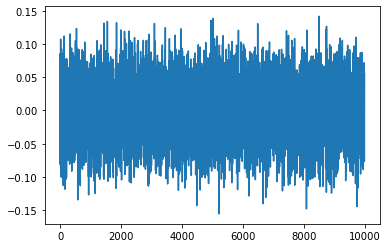

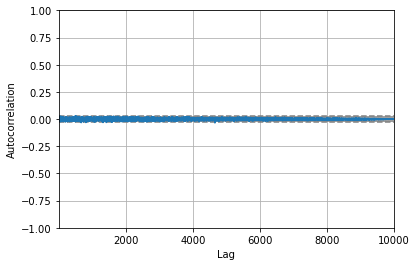

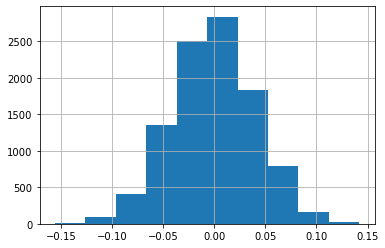

count    10000.000000
mean        -0.000616
std          0.040381
min         -0.155793
25%         -0.028285
50%         -0.000412
75%          0.026886
max          0.141902
dtype: float64


In [27]:
from random import gauss
from random import seed
from pandas import Series
from pandas import Series
from pandas.plotting import autocorrelation_plot
import matplotlib as plt
from pylab import*

series=[gauss(0.0,1.0) for i in range(10000)]

dt=1/600

for i in range(10000):
    series[i]=series[i]*np.sqrt(dt)
    
series=Series(series)
plt.plot(series)
plt.show()

autocorrelation_plot(series)
plt.show()

series.hist()
plt.show()

print(series.describe())

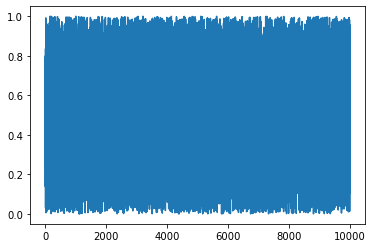

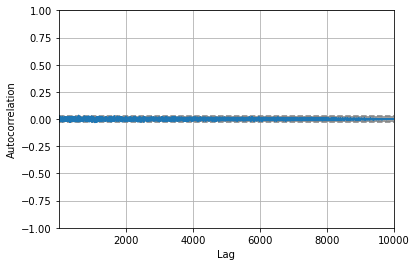

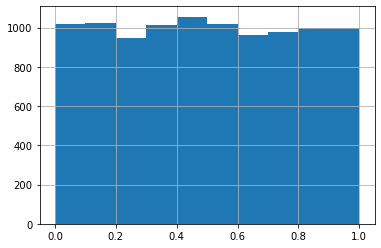

In [22]:
import random as random
import numpy as np

prueba=np.zeros([10000])
for i in range(10000):
    prueba[i]=random.random()
    
plt.plot(prueba)
plt.show()

prueba=Series(prueba)

autocorrelation_plot(prueba)
plt.show()

prueba.hist()
plt.show()